# Factors Analyzed for their Contributions to Heart Disease 
**Capstone 1 Milestone Report**

## Introduction

**Predicting heart disease risk**


*The problem*

Heart disease is one of the greatest causes of death, though it is not necessarily clear which patient health factors contribute most to risk of heart disease.


*Potential clients*

Understanding of the relative risks leading to heart disease would be useful to multiple stakeholders. The patient care community, as well as patients themselves, could benefit from awareness of specific risk factors. Insurers, whether private or publicly administered, would have an interest in knowing which factors make people vulnerable to heart disease and its outcomes, both to administer resources and to incentivize strategies to lead to optimal health. Heart disease is not simply a problem of industrialized nations, either, and non-governmental organizations could make use of knowledge of risk factors for treatment and prevention, including education, in areas where they are able to make an impact on public health. Publicly funded medical researchers and pharmaceutical companies could use information about the etiology of heart disease to develop treatments or preventive medications, since it is quite possible that heart disease is mediated not by lifestyle choices alone.


*Data sources*

Data used for this machine learning project come from the University of California, Irvine Machine Learning [Repository](http://archive.ics.uci.edu/ml/datasets/Heart+Disease). Datasets regarding heart disease risk factors are used here from three distinct patient populations, including Cleveland, Ohio (N=282), Long Beach, California (N=200), and Hungary (N=294). There are processed datasets available (examining 13 possible contributing factors, in addition to the target variable), but they do contain missing data to be addressed in the process of preparing the data for machine learning methods. 


*Project expectations*

The target variable to be predicted in our machine learning model is presence and level of heart disease, which is organized within the data as a classification system with five levels (including a category for absence of heart disease). We can choose a binomial, categorical classification system (heart disease diagnosis likely versus not) based on labeled data, and a supervised classification model would be a prudent approach for this. The model would include probability of categorization into either class. Alternatively, we can choose to categorize predictions into any of the five possible classes, using a multiclass classification approach with logistic regression, a neural network, or a decision forest. 

While it is useful to have three separate populations from two countries included in this data analysis, a caveat is that all will have come from Western, industrialized nations, possibly limiting the power of any model arising from this analysis to extrapolate into other regions of the world.
 
This project eventually will include development of the following items: codes for importation of data, data cleanup, exploratory data and inferential analyses, and model development. A project report and a slide deck summarizing the project and its findings will also be provided.


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
import seaborn as sns
from IPython.display import display, HTML
from mpl_toolkits.axes_grid1 import make_axes_locatable
import itertools


locationrisk = [['Ohio', 7.62], ['Cleveland, OH', 8.76], ['California', 5.30], ['Long Beach, CA', 5.46]]
locationriskdf = pd.DataFrame(locationrisk)
locationriskdf.columns=['Location', 'Heart Disease Rate']
print('\033[1m \n Table 1. Heart disease rates in key locations (from CDC.gov)')
display(HTML(locationriskdf.to_html(index=False)))

 
 Table 1. Heart disease rates in key locations (from CDC.gov)


Location,Heart Disease Rate
Ohio,7.62
"Cleveland, OH",8.76
California,5.30
"Long Beach, CA",5.46


Table 1 shows rates of heart disease in locations from the United States that are relevant to this study, from data collected by the United States Centers for Disease Control. The rate comes from a prevalence calculated as described [here](https://www.cdc.gov/500cities/definitions/health-outcomes.htm#CHD). Statewide, Ohio shows a higher rate of heart disease than does California, while within these states Cleveland, Ohio, seems to show a higher rate of heart disease than does Ohio, and Long Beach, California, seems to show a rate of heart disease comparable to the rate for California.
___

## Data description and cleanup
*Data sources*

The data for this analysis comes from three datasets that each contain the same columns of information, and the datasets are available from the University of California, Irvine Machine Learning [Repository](http://archive.ics.uci.edu/ml/datasets/Heart+Disease). The variables (listed in Table 2 according to definitions that accompany the datasets) encompassed by these data include years of age (age), sex (sex), chest pain type (cp), resting blood pressure (trestbps), cholesterol (chol), fasting blood sugar (fbs), resting electrocardiographic results (restecg), maximum heart rate (thalach), exercise-induced angina (exang), ST depression induced by exercise and relative to rest (oldpeak), slope of the peak exercise ST segment (slope), coronary angiography score (ca), thalassemia defect (thal), and numerical score (num) representing the degree of heart disease detected by angiography. This last value is the target variable.  

This list consists of both discrete variables and continuous variables. Age, trestbps, chol, thalach, and oldpeak are continuous variables, while the remaining variables are categorical in nature. The target variable, num, is a categorical variable on a scale of 0 to 5, with 0 meaning no heart disease and 5 being the level of greatest severity.



In [68]:
variables = [['age','age'], ['sex','sex'], ['cp','chest pain type'], ['trestpbs','resting blood pressure'], 
             ['chol','cholesterol level'], ['fbs','fasting blood sugar'], 
             ['restecg','resting electrocardiographic results'], ['thalach','maximum heart rate'],
            ['exang','exercise-induced angina'], ['oldpeak','ST depression induced by exercise and relative to rest'],
            ['slope','slope of the peak exercise ST segment'], ['ca','coronary angiography score'], 
            ['thal','thalassemia defect'], ['num','numerical heart disease score']]
variablesdf = pd.DataFrame(variables)
variablesdf.columns=['Variable Name', 'Definition of Variable (from UCI Machine Learning Repository)']
print('\033[1m \n Table 2. Heart disease feature names and their abbreviations')
pd.set_option('display.max_colwidth', 70)
display(HTML(variablesdf.to_html(index=False)))


 
 Table 2. Heart disease feature names and their abbreviations


Variable Name,Definition of Variable (from UCI Machine Learning Repository)
age,age
sex,sex
cp,chest pain type
trestpbs,resting blood pressure
chol,cholesterol level
fbs,fasting blood sugar
restecg,resting electrocardiographic results
thalach,maximum heart rate
exang,exercise-induced angina
oldpeak,ST depression induced by exercise and relative to rest


*Data cleanup*

The missing values were originally denoted differently according to data file. The code for a missing value in data from the Cleveland, OH, and Long Beach, CA, datasets was a "?", and a missing value in the Hungarian dataset (reprocessed, used here) was denoted as "-9.0". In each case, a missing values was replaced with "NaN" prior to further processing. Initially datatypes were all treated as floats for flexibility in assigning NaN entries, but later the datatypes were altered as appropriate for the data. 

After replacing missing values with NaN's, the next step was to examine data distributions for each variable by viewing histograms to assess whether values show normal distributions, and to identify if there were obvious and inappropriate outliers (for instance, a missing value that should have been noted as "-9.0" but was entered as "9.0" for a categorical variable whose values were not to exceed 3). Additionally, getting an idea of the nature of a variable enabled the decision whether to assign missing values the median or mode of population values for the variable. In general, if a variable showed a relatively normal distribution, particularly for continuous data, then the median was used to assign to missing values. If a variable was not distributed in this way, particularly for categorical data, the mode was typically chosen. Exceptions to this method of value-assignment were allowed as seemed appropriate for a variable, and all are subject change as appropriate according to machine learning model development. This step of value-assignment for missing values was taken prior to consolidating data among populations in case there were location-based differences in median or mode, which seemed likely given that histograms identified slight variation in populations for some variables. For the "num" variable, one entry was removed from the Hungarian dataset prior to dataset consolidation due to a single missing value, and for all datasets the "num" datatype was adjusted as an integer datatype. 

Next, the datasets for each population were consolidated into a single dataframe (named "all_three_df"). A new column was added with the location information for each entry for future reference. It should be noted that of all the source files, the Cleveland dataset was initially the most complete with the least missing values, so this population has potential to influence overall analyses most highly.

After consolidation of all data into a single dataframe, datatypes were adjusted if needed for the nature of the data in each column. Continuous variables were kept as floats, and categorical data were converted to integers to allow for flexibility with calculations with the data (rather than set to categorical or boolean values at this point). 

In [69]:
#Data import, cleaning steps, and consolidation. Code for info, head, and component histograms are available here,
#but coded out so as to simplify output. However, they can be viewed in output by removing sets of triple quotation
#marks.

#___________________________________________cleveland import_______________________________________________________________________________________________________
cleveland_df = pd.read_csv('/Users/vickimoore/Desktop/Springboard/UCIheartdiseasedata/UCI_heart_newDL/Processed/processed_cleveland_data.csv', header=None, na_values = '?')
cleveland_df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
cleveland_df['sex'] = cleveland_df['sex'].astype(float)
cleveland_df['cp'] = cleveland_df['cp'].astype(float)
cleveland_df['fbs'] = cleveland_df['fbs'].astype(float)
cleveland_df['restecg'] = cleveland_df['restecg'].astype(float)
cleveland_df['exang'] = cleveland_df['exang'].astype(float)
cleveland_df['slope'] = cleveland_df['slope'].astype(float)
cleveland_df['ca'] = cleveland_df['ca'].astype(float) #throws errors over the NaN for int, just changing these to floats for now
cleveland_df['thal'] = cleveland_df['thal'].astype(float)
cleveland_df.insert(0, 'location', 'Cleveland')
'''
print('cleveland')
print(cleveland_df.head()) 
print(cleveland_df.columns) 
print(cleveland_df.info()) 
'''


#___________________________________________hungarian import_______________________________________________________________________________________________________
hungarian_df = pd.read_csv('/Users/vickimoore/Desktop/Springboard/UCIheartdiseasedata/UCI_heart_newDL/Processed/reprocessed_hungarian_data.txt', sep=" ", header=None, na_values = '-9.0')
hungarian_df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
hungarian_df['sex'] = hungarian_df['sex'].astype(float)
hungarian_df['cp'] = hungarian_df['cp'].astype(float)
hungarian_df['fbs'] = hungarian_df['fbs'].astype(float)
hungarian_df['restecg'] = hungarian_df['restecg'].astype(float)
hungarian_df['exang'] = hungarian_df['exang'].astype(float)
hungarian_df['slope'] = hungarian_df['slope'].astype(float)
hungarian_df['ca'] = hungarian_df['ca'].astype(float)
hungarian_df['thal'] = hungarian_df['thal'].astype(float)
hungarian_df = hungarian_df[np.isfinite(hungarian_df['num'])]
hungarian_df['num'] = hungarian_df['num'].astype(int)
hungarian_df.insert(0, 'location', 'Hungary')
'''
print('hungarian')
print(hungarian_df.head()) 
print(hungarian_df.columns) 
print(hungarian_df.info()) 
'''

#___________________________________________long beach import_______________________________________________________________________________________________________
long_beach_df = pd.read_csv('/Users/vickimoore/Desktop/Springboard/UCIheartdiseasedata/UCI_heart_newDL/Processed/processed_va_data.csv', header=None, na_values = '?')
long_beach_df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
long_beach_df['age'] = long_beach_df['age'].astype(float)
long_beach_df['fbs'] = long_beach_df['fbs'].astype(float)
long_beach_df['exang'] = long_beach_df['exang'].astype(float)
long_beach_df['slope'] = long_beach_df['slope'].astype(float)
long_beach_df['ca'] = long_beach_df['ca'].astype(float)
long_beach_df['thal'] = long_beach_df['thal'].astype(float)
long_beach_df.insert(0, 'location', 'Long_Beach')
'''
print('long beach')
print(long_beach_df.head()) 
print(long_beach_df.columns) 
print(long_beach_df.info()) 
'''

#get rid of any entry with NaN in num.
cleveland_df = cleveland_df[np.isfinite(cleveland_df['num'])]
hungarian_df = hungarian_df[np.isfinite(hungarian_df['num'])]
long_beach_df = long_beach_df[np.isfinite(long_beach_df['num'])]


#___________________________________________ca distribution and fix na in hungarian, switch out NaN's_______________________________________________________________________________________________________
'''
cleveland_df['ca'].plot(kind='hist', color='blue')
plt.show()
hungarian_df['ca'].plot(kind='hist', color='red')
plt.show()
long_beach_df['ca'].plot(kind='hist', color='purple')
plt.show()

print(hungarian_df['ca'][30:50])
hungarian_df['ca'][39] = np.nan
print(hungarian_df['ca'][30:50])
cleveland_df['ca'].plot(kind='hist', color='blue')
plt.show()
hungarian_df['ca'].plot(kind='hist', color='red')
plt.show()
long_beach_df['ca'].plot(kind='hist', color='purple')
plt.show()
print('ca')
cleveland_df['ca'].plot(kind='hist', color='blue')
hungarian_df['ca'].plot(kind='hist', color='red')
long_beach_df['ca'].plot(kind='hist', color='purple')
plt.show()
'''

# ca was discrete and non-normal. use mode.
ca_mode_cleveland = cleveland_df.ca.mode()
cleveland_df['ca'] = cleveland_df.ca.fillna(ca_mode_cleveland[0])
#print(cleveland_df.info())
ca_mode_hungarian = hungarian_df.ca.mode()
hungarian_df['ca'] = hungarian_df.ca.fillna(ca_mode_hungarian[0])
#print(hungarian_df.info())
ca_mode_long_beach = long_beach_df.ca.mode()
long_beach_df['ca'] = long_beach_df.ca.fillna(ca_mode_long_beach[0])
'''
print(long_beach_df.info())
print('age')
cleveland_df['age'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['age'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['age'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
'''
#dist varies by pop but overall mostly normal, slight skew to right. continuous var. will use median for missing.
age_median_cleveland = cleveland_df.age.median()
cleveland_df['age'] = cleveland_df.age.fillna(age_median_cleveland)
age_median_hungarian = hungarian_df.age.median()
hungarian_df['age'] = hungarian_df.age.fillna(age_median_hungarian)
age_median_long_beach = long_beach_df.age.median()
long_beach_df['age'] = long_beach_df.age.fillna(age_median_long_beach)
'''
print('sex')
cleveland_df['sex'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['sex'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['sex'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
'''
#discrete and non-normal. mostly male. use mode for right now, subject to change.
sex_mode_cleveland = cleveland_df.sex.mode()
cleveland_df['sex'] = cleveland_df.sex.fillna(sex_mode_cleveland[0])
sex_mode_hungarian = hungarian_df.sex.mode()
hungarian_df['sex'] = hungarian_df.sex.fillna(sex_mode_hungarian[0])
sex_mode_long_beach = long_beach_df.sex.mode()
long_beach_df['sex'] = long_beach_df.sex.fillna(sex_mode_long_beach[0])
'''
print('cp')
cleveland_df['cp'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['cp'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['cp'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
'''
#discrete and non-normal, but hungarian looks different from others. either median or mode, not sure yet. just go with median right now.
cp_median_cleveland = cleveland_df.cp.median()
cleveland_df['cp'] = cleveland_df.cp.fillna(cp_median_cleveland)
cp_median_hungarian = hungarian_df.cp.median()
hungarian_df['cp'] = hungarian_df.cp.fillna(cp_median_hungarian)
cp_median_long_beach = long_beach_df.cp.median()
long_beach_df['cp'] = long_beach_df.cp.fillna(cp_median_long_beach)
'''
print('trestbps')
cleveland_df['trestbps'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['trestbps'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['trestbps'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
'''
#continuous and close enough to normal. use median.
trestbps_median_cleveland = cleveland_df.trestbps.median()
cleveland_df['trestbps'] = cleveland_df.trestbps.fillna(trestbps_median_cleveland)
trestbps_median_hungarian = hungarian_df.trestbps.median()
hungarian_df['trestbps'] = hungarian_df.trestbps.fillna(trestbps_median_hungarian)
trestbps_median_long_beach = long_beach_df.trestbps.median()
long_beach_df['trestbps'] = long_beach_df.trestbps.fillna(trestbps_median_long_beach)
'''
print('chol')
cleveland_df['chol'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['chol'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['chol'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
'''
#continuous and close enough to normal. use median.
chol_median_cleveland = cleveland_df.chol.median()
cleveland_df['chol'] = cleveland_df.chol.fillna(chol_median_cleveland)
chol_median_hungarian = hungarian_df.chol.median()
hungarian_df['chol'] = hungarian_df.chol.fillna(chol_median_hungarian)
chol_median_long_beach = long_beach_df.chol.median()
long_beach_df['chol'] = long_beach_df.chol.fillna(chol_median_long_beach)
'''
print('fbs')
cleveland_df['fbs'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['fbs'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['fbs'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
'''
#discrete and non-normal. vast majority one value. use mode.
fbs_mode_cleveland = cleveland_df.fbs.mode()
cleveland_df['fbs'] = cleveland_df.fbs.fillna(fbs_mode_cleveland[0])
fbs_mode_hungarian = hungarian_df.fbs.mode()
hungarian_df['fbs'] = hungarian_df.fbs.fillna(fbs_mode_hungarian[0])
fbs_mode_long_beach = long_beach_df.fbs.mode()
long_beach_df['fbs'] = long_beach_df.fbs.fillna(fbs_mode_long_beach[0])
'''
print('restecg')
cleveland_df['restecg'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['restecg'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['restecg'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
'''
#looks discrete and non-normal. varies by population. 
#unclear whether median or mode best yet. just go with median right now.
restecg_median_cleveland = cleveland_df.restecg.median()
cleveland_df['restecg'] = cleveland_df.restecg.fillna(restecg_median_cleveland)
restecg_median_hungarian = hungarian_df.restecg.median()
hungarian_df['restecg'] = hungarian_df.restecg.fillna(restecg_median_hungarian)
restecg_median_long_beach = long_beach_df.restecg.median()
long_beach_df['restecg'] = long_beach_df.restecg.fillna(restecg_median_long_beach)
'''
print('thalach')
#sns.set()
#sns.distplot(cleveland_df['thalach'], color='blue', hist=True, bins=10, fit=norm)
#sns.distplot(hungarian_df['thalach'], color='red', hist=True, bins=10, fit=norm)
#sns.distplot(long_beach_df['thalach'], color='purple', hist=True, bins=10, fit=norm)
cleveland_df['thalach'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['thalach'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['thalach'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
'''
#continuous but dist depends on population. use median for now.
thalach_median_cleveland = cleveland_df.thalach.median()
cleveland_df['thalach'] = cleveland_df.thalach.fillna(thalach_median_cleveland)
thalach_median_hungarian = hungarian_df.thalach.median()
hungarian_df['thalach'] = hungarian_df.thalach.fillna(thalach_median_hungarian)
thalach_median_long_beach = long_beach_df.thalach.median()
long_beach_df['thalach'] = long_beach_df.thalach.fillna(thalach_median_long_beach)
'''
print('exang')
cleveland_df['exang'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['exang'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['exang'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
'''
#exang discrete and non-normal, but depends on pop. probably use mode for each pop.
exang_mode_cleveland = cleveland_df.exang.mode()
cleveland_df['exang'] = cleveland_df.exang.fillna(exang_mode_cleveland[0])
exang_mode_hungarian = hungarian_df.exang.mode()
hungarian_df['exang'] = hungarian_df.exang.fillna(exang_mode_hungarian[0])
exang_mode_long_beach = long_beach_df.exang.mode()
long_beach_df['exang'] = long_beach_df.exang.fillna(exang_mode_long_beach[0])
'''
print('oldpeak')
cleveland_df['oldpeak'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['oldpeak'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['oldpeak'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
'''
#continuous but non-normal, skewed to 0. use mode or median, use median for now.
oldpeak_median_cleveland = cleveland_df.oldpeak.median()
cleveland_df['oldpeak'] = cleveland_df.oldpeak.fillna(oldpeak_median_cleveland)
oldpeak_median_hungarian = hungarian_df.oldpeak.median()
hungarian_df['oldpeak'] = hungarian_df.oldpeak.fillna(oldpeak_median_hungarian)
oldpeak_median_long_beach = long_beach_df.oldpeak.median()
long_beach_df['oldpeak'] = long_beach_df.oldpeak.fillna(oldpeak_median_long_beach)
'''
print('slope')
cleveland_df['slope'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['slope'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['slope'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
'''
#discrete and non-normal but not really skewed. use median.
slope_median_cleveland = cleveland_df.slope.median()
cleveland_df['slope'] = cleveland_df.slope.fillna(slope_median_cleveland)
slope_median_hungarian = hungarian_df.slope.median()
hungarian_df['slope'] = hungarian_df.slope.fillna(slope_median_hungarian)
slope_median_long_beach = long_beach_df.slope.median()
long_beach_df['slope'] = long_beach_df.slope.fillna(slope_median_long_beach)
'''
print('thal')
cleveland_df['thal'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['thal'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['thal'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
'''
#discrete and non-normal. but evenly split. maybe median? 
#just to keep with current convention of erring on side of median, use median right now.
thal_median_cleveland = cleveland_df.thal.median()
cleveland_df['thal'] = cleveland_df.thal.fillna(thal_median_cleveland)
thal_median_hungarian = hungarian_df.thal.median()
hungarian_df['thal'] = hungarian_df.thal.fillna(thal_median_hungarian)
thal_median_long_beach = long_beach_df.thal.median()
long_beach_df['thal'] = long_beach_df.thal.fillna(thal_median_long_beach)
'''
#TARGET variable is num
print('num')
cleveland_df['num'].plot(kind='hist', color='blue', alpha=0.7)
hungarian_df['num'].plot(kind='hist', color='red', alpha=0.7)
long_beach_df['num'].plot(kind='hist', color='purple', alpha=0.7)
plt.show()
cleveland_df['num'].plot(kind='hist', color='blue')
plt.show()
hungarian_df['num'].plot(kind='hist', color='red')
plt.show()
long_beach_df['num'].plot(kind='hist', color='purple')
plt.show()
'''
#added location columns to each up above so as to combine files here.
all_three_df = pd.concat([cleveland_df, hungarian_df, long_beach_df], ignore_index=True)
all_three_df = all_three_df[np.isfinite(all_three_df['num'])]
#print(all_three_df)
#___________________________________________set dtypes_____________________________________________________________________________________________________________
all_three_df['location'] = all_three_df['location'].astype(str)
all_three_df['age'] = all_three_df['age'].astype(float)
all_three_df['sex'] = all_three_df['sex'].astype(int)
all_three_df['cp'] = all_three_df['cp'].astype(int)
all_three_df['trestbps'] = all_three_df['trestbps'].astype(float)
all_three_df['chol'] = all_three_df['chol'].astype(float)
all_three_df['fbs'] = all_three_df['fbs'].astype(int)
all_three_df['restecg'] = all_three_df['restecg'].astype(int)
all_three_df['thalach'] = all_three_df['thalach'].astype(float)
all_three_df['exang'] = all_three_df['exang'].astype(int)
all_three_df['oldpeak'] = all_three_df['oldpeak'].astype(float)
all_three_df['slope'] = all_three_df['slope'].astype(int)
all_three_df['ca'] = all_three_df['ca'].astype(int)
all_three_df['thal'] = all_three_df['thal'].astype(int)
all_three_df['num'] = all_three_df['num'].astype(int) 
#print(all_three_df.info())



___

## Exploring the data

*Preliminary examination of the data*

The initial interrogation of data surrounded visualization of qualitative patterns in data using basic exploratory data analysis tools. This was partially involved in the data cleaning steps described above, as population distributions of variables were used for preliminary value-assignments for missing data from each of the three component datasets. Figures 1 and 2 below show histograms for all variables (Figure 1) and with more detail for continuous variables (Figure 2), with curves overlain with normal curves in black for visual comparison. These allow visualizations of the nature of each variable. 

In general, throughout this study a null hypothesis is that markers of poorer cardiac health, as well as increased age, are not related to presence or level of heart disease. This can be examined most accurately for categorical variables through chi-square tests of independence, as the target variable is also a categorical variable. Another null hypothesis is that more broadly none of the variables in this study influence each other. Categorical variables can be examined versus each other using chi-square tests of independence, and continuous variables can be measured against each other using Pearson correlation coefficient analyses. These will be shown in the next section.

A primary aim of this project is to use the variables in the dataset for quantitative predictive analysis through machine learning techniques. If a null hypothesis cannot be rejected, then it likely will be of no value for prediction. The strength of a statistically significant relationship between variables may indicate predictive utility for the machine learning model. However, strong relationships between variables other than the target variable may complicate the model. 

Apart from prediction of the target variable, one possible prediction could be that age itself is correlated with markers of poorer cardiac health. Another prediction could be that sex is an important factor in heart disease risk, with men showing greater proneness. It is important to keep in mind, though, that women may show different predictive features than men do. 

Linear regression plots of some of the continuous variables (Figures 3-8 below) provide another preliminary-level analysis of some possible relationships of interest. Trendlines for these are differentiated by sex to see if there were differences between men and women for any patterns.

Not all possible comparisons appear here in the preliminary figures because most data are categorical, so they will be examined separately from continuous variables. However, continuous variables are compared, basic statistics for each variable are achievable, and some preliminary interpretations are possible. The later analyses in this notebook will explore correlation coefficients and chi-square contingencies between variables.

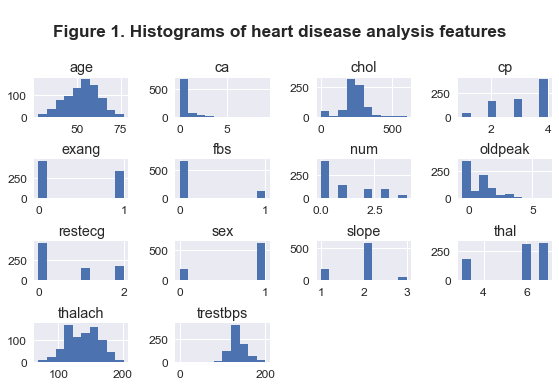

In [4]:
sns.set(font_scale=1.20)
all_three_df.hist()
plt.suptitle('\nFigure 1. Histograms of heart disease analysis features', fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.80)
plt.show()

Figure 1 shows the general structure of data from each variable in the consolidated dataset, with most variables being categorical in nature. For many individuals the target variable, "num", shows the highest number of individuals to have a category of "0", which indicates lack of detected heart disease. However, there are many individuals in this dataset who appear to have detectable heart disease (categories 1-4).

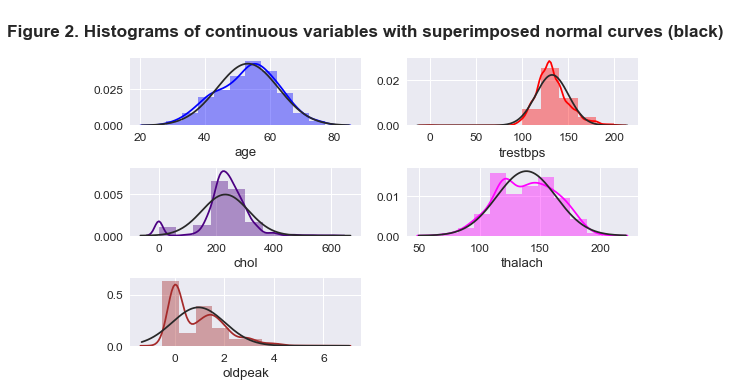

In [5]:
sns.set(font_scale=1.20)
plt.subplot(3,2,1)
plt.suptitle("\nFigure 2. Histograms of continuous variables with superimposed normal curves (black)", fontweight='bold')
sns.distplot(all_three_df['age'], color='blue', hist=True, bins=10, fit=norm)
plt.subplot(3,2,2)
sns.distplot(all_three_df['trestbps'], color='red', hist=True, bins=10, fit=norm)
plt.subplot(3,2,3)
sns.distplot(all_three_df['chol'], color='indigo', hist=True, bins=10, fit=norm)
plt.subplot(3,2,4)
sns.distplot(all_three_df['thalach'], color='magenta', hist=True, bins=10, fit=norm)
plt.subplot(3,2,5)
sns.distplot(all_three_df['oldpeak'], color='brown', hist=True, bins=10, fit=norm)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

In Figure 2 continuous variables from this dataset are shown with normal curves overlain in black to enable visual comparison of data from each variable versus expectations if data are normally distributed. The variables age, "trestbps", and "thalach" show good agreement with normal curves, while "chol" and "oldpeak" diverge a bit more, though chol shows a mean close to that expected with a normal distribution.

Figures 3-8 show relationships between continuous variables, examined as simple linear regressions but divided by sex.

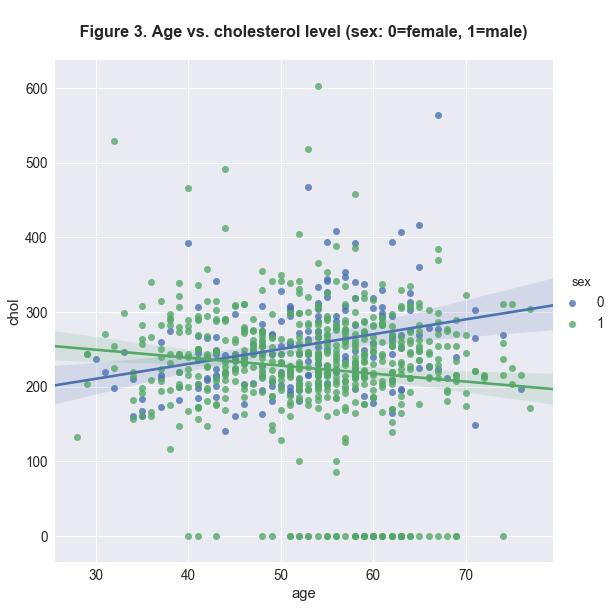

In [6]:
sns.set(font_scale=1.35)
sns.lmplot(x='age', y='chol', data=all_three_df, hue='sex',size=8)
plt.title('\n Figure 3. Age vs. cholesterol level (sex: 0=female, 1=male) \n', fontweight='bold')
plt.show()

In Figure 3, it is hard to distinguish an obvious relationship between age and cholesterol, though by sex it appears from the data available here that for women there is a trend between increasing age and cholesterol level. For men, the trend appears in the opposite direction using these data. 

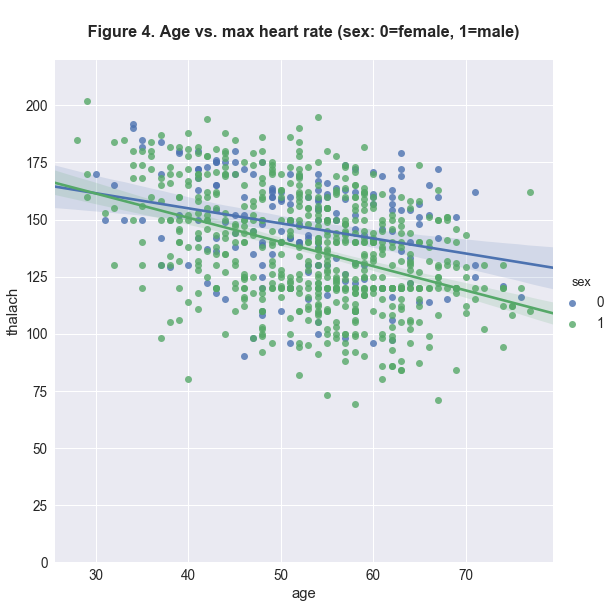

In [7]:
sns.set(font_scale=1.35)
axy = sns.lmplot(x='age', y='thalach', data=all_three_df, hue='sex', size=8)
plt.title('\n Figure 4. Age vs. max heart rate (sex: 0=female, 1=male) \n', fontweight='bold')
axy.set(ylim=(0, 220))
plt.show()

In Figure 4, from these data there appears to be a slight downward trend in maximum heart rate ("thalach") with age. This is apparent for both sexes, possibly more for men.

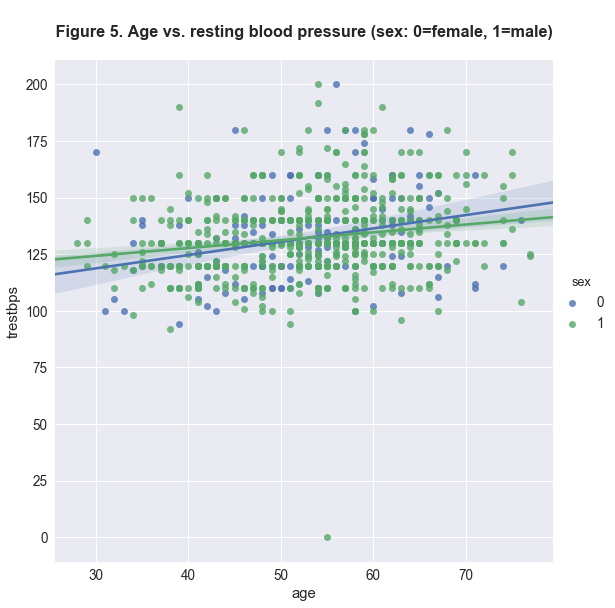

In [8]:
sns.set(font_scale=1.35)
sns.lmplot(x='age', y='trestbps', data=all_three_df, hue='sex', size=8)
plt.title('\n Figure 5. Age vs. resting blood pressure (sex: 0=female, 1=male) \n', fontweight='bold')
plt.show()

In Figure 5, from these data it appears that resting blood pressure ("trestbps") tends to increase with age for both sexes.

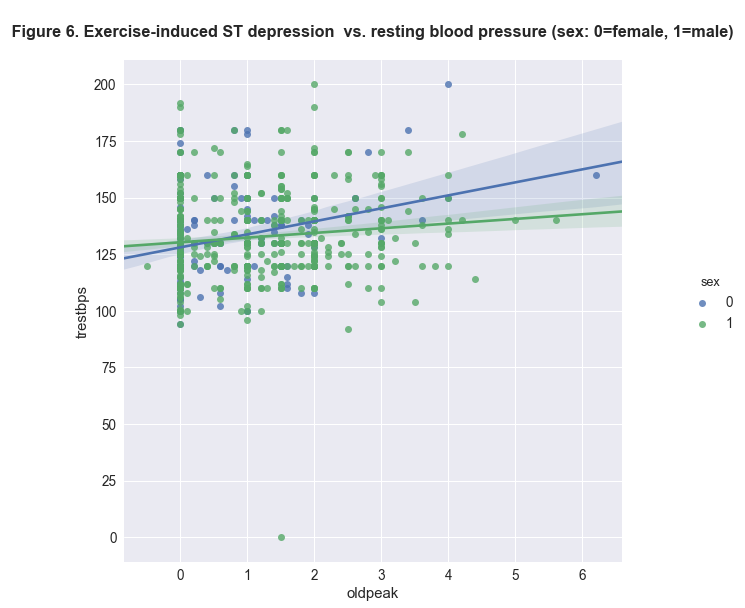

In [9]:
sns.set(font_scale=1.35)
sns.lmplot(x='oldpeak', y='trestbps', data=all_three_df, hue='sex', size=8)
plt.title('\n Figure 6. Exercise-induced ST depression  vs. resting blood pressure (sex: 0=female, 1=male) \n', 
          fontweight='bold')
plt.show()

In Figure 6, it is difficult to discern a clear relationship between exercise-induced ST depression ("oldpeak") and resting blood pressure ("trestbps"). There is possibly a weak, positive trend, but this is difficult to assess from this plot with very large bands around trendlines.

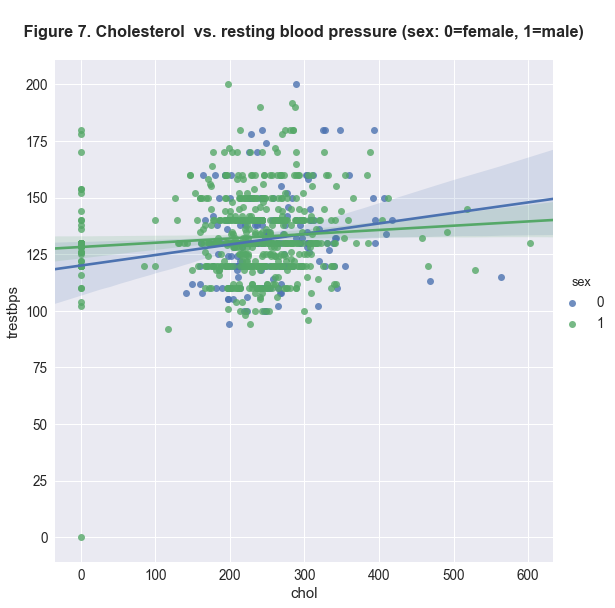

In [10]:
sns.set(font_scale=1.35)
sns.lmplot(x='chol', y='trestbps', data=all_three_df, hue='sex', size=8)
plt.title('\n Figure 7. Cholesterol  vs. resting blood pressure (sex: 0=female, 1=male) \n', fontweight='bold')
plt.show()

In Figure 7, with these data it appears that the relationship between cholesterol level ("chol") and resting heart rate ("trestbps") may be weak. This figure suggests a slightly stronger trend for women than for men for this relationship, though the confidence interval for women is quite broad.

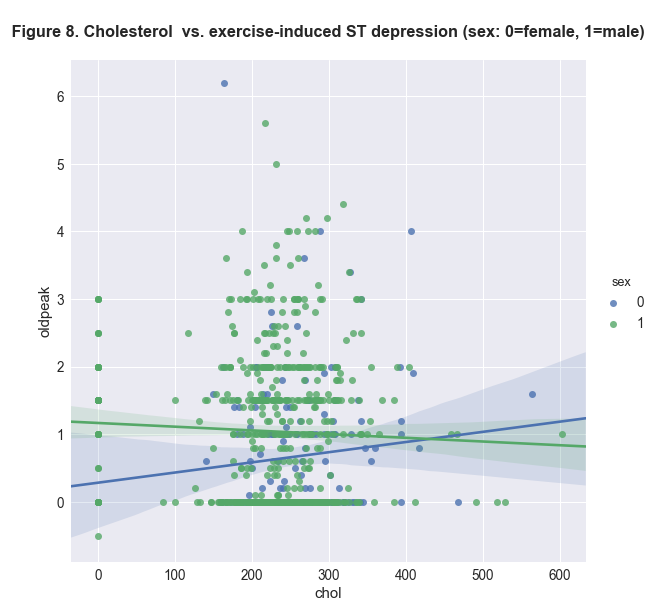

In [11]:
sns.set(font_scale=1.35)
sns.lmplot(x='chol', y='oldpeak', data=all_three_df, hue='sex', size=8)
plt.title('\n Figure 8. Cholesterol  vs. exercise-induced ST depression (sex: 0=female, 1=male) \n', fontweight='bold')
plt.show()

In Figure 8, with these data it is difficult to discern a clear pattern for exercise-induced ST depression ("oldpeak") and cholesterol level ("chol").

Overall, most of the data available in this dataset do not show striking patterns between variables paired against each other one-on-one. Also, many variables are categorical, which are harder to plot and view patterns with, so they are excluded here. Among the continuous variables, though, there may be some patterns that show predictive value. More sophisticated analyses of variables such as cholesterol and sex may show stronger correlations with level of heart disease than what is viewable in the simpler exploratory analyses shown here. Some categorical variables in this study are derived from metrics that are continuous in nature, but are here allocated into bins based on where the numbers fall in ranges. 

It is hard to make much of these data at this point, but even though there is much noise in the data viewed here, the trendlines show potential for some relationships.



*Exploratory data analysis approach*

There is a total of 14 numerical variables, including the target variable, included in this dataset. Some are continuous variables, including age, "trestbps", "chol", "thalach", and "oldpeak". The rest are categorical variables, including sex (two categories as 0 and 1), "cp" (four categories as 1, 2, 3, and 4), "fbs" (two categories as 0 and 1), "restecg" (three categories as 0, 1, and 2), "exang" (two categories as 0 and 1), "slope" (three categories as 1, 2, and 3), "ca" (four categories as 0, 1, 2, and 3), "thal" (three categories as 3, 6, and 7), and the target variable "num" (five categories as 0, 1, 2, 3, and 4). Location is a separate variable to consider in the consolidated dataset, as the location associated with each subset is added in a new column in the consolidated set.

The continuous and categorical variables are explored here differently. Primarily, continuous variables are compared with each other using tests of Pearson's correlation coefficients, and categorical variables are primarily compared to each other using chi-square tests of independence.

A goal of inferential analyses in this study is to determine levels of correlation between variables and to judge the statistical significance of any of these relationships. The null hypothesis for each test is that there is no correlation between variables, with an alternate hypothesis for each being that there is a correlation. Figure 9 and Tables 3 and 4 will explore these relationships.


Figure 9. Heatmap of correlations between variables


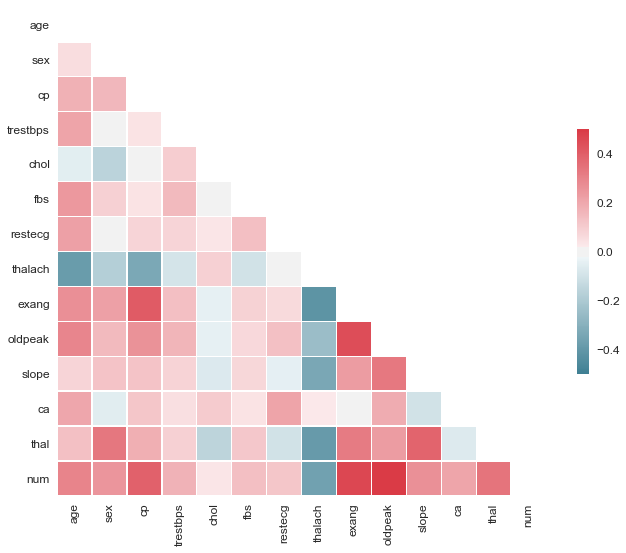

In [63]:
sns.set(style="white", font_scale=1.20)
corr = all_three_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
# mask upper triangle by replacing values with 0 and masking zeros
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
print('\033[1m' + "\nFigure 9. Heatmap of correlations between variables")
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Figure 9 shows the strengths of relationships between variables paired against one another with darker red cells  representing stronger, positive relationships. Darker blue cells represent stronger, negative relationships. The palest cells show the weakest relationships. The feature that shows the greatest amount of dark blue cells is "thalach" (maximum heart rate). This should be unsurprising, as higher values for many variables in this study are suggestive of less optimal health, and maximum heart rate is a measure of cardiac strength.

For relationships with the target variable, "num" or heart disease score, the strongest positive relationships appear to be with "oldpeak" (defined [here](http://archive.ics.uci.edu/ml/datasets/Heart+Disease) as "ST depression induced by exercise and relative to rest") and "exang" (exercise-induced angina). Both of these are features that are either a sign or a symptom of possible cardiovascular distress, though it is not obvious why other features directly related to cardiac health in this dataset show less of a relationship to heart disease score. However, both are defined as exercise-related features, and perhaps that is a condition in which cardiovascular stress is especially prominent. "Oldpeak" and "exang" in this heatmap also show a relatively strong relationship to each other.

Cholesterol level is a variable that does not show strong relationships with other features in this study. Its strongest relationship, from the data available here, seems to be with sex, and it is a negative relationship. For sex this means that it is relatively higher with women than with men. Figues 3, 7, and 8 (above) indicate that cholesterol trends slightly higher for women than for men, especially with age. However, versus the target variable, here cholesterol seems to show the weakest relationship. 

"Fbs" (fasting blood sugar) is another variable that shows relatively weak relationships with other variables in this study. Its strongest relationship is a possibly weak relationship with age. This is not surprising as insulin resistance may be more likely with age, though it does not seem to show a strong pattern with variables here that are directly tied to cardiac health. 

Some features in Figure 9 appear to show no relationships. It is possible, though, that interactions between variables may be important, such as the example in which there seems to be very little relationship between cholesterol and age, but when data are split by sex, as in Figure 3, opposite patterns appear. This heatmap is based on a correlation matrix, which is calculated most accurately for continuous variables, though many categorical variables in this study are bins for continuous data, so a heatmap may be used for a rough approximation of the strengths of relationships between variables. For calculated values, Table 3 shows Pearson correlation coefficients and significance values for relationships between continuous variables, and Table 4 shows chi-square statistics and significance values derived from chi-square tests of independence between categorical variables. For each of these tables, relationships with p-values that are set to < 0.001 are shown in bold.

In [71]:
def pearson_general(colA, colB, alpha=0.001):
    A = all_three_df[colA].astype(float)
    B = all_three_df[colB].astype(float) 
    
    r, p = pearsonr(B,A)
    if p<alpha:
        result="\033[1m {} with {}:".format(colA,colB)
    else:
        result="\033[0m {} with {}:".format(colA,colB)
    print(result, f"Pearson r = {round(r,3)}, p = {round(p,5)}")

print('\033[4m\033[1m\nTable 3. Pearson correlation coefficients (r) and p-values (p) for relationships between continuous variables:\n\033[0m')
cols = ['age','trestbps', 'chol', 'thalach', 'oldpeak']
for e,f in itertools.combinations(cols,2):
    pearson_general(e,f)


Table 3. Pearson correlation coefficients (r) and p-values (p) for relationships between continuous variables:

 age with trestbps: Pearson r = 0.213, p = 0.0
 age with chol: Pearson r = -0.053, p = 0.13291
 age with thalach: Pearson r = -0.382, p = 0.0
 age with oldpeak: Pearson r = 0.296, p = 0.0
 trestbps with chol: Pearson r = 0.1, p = 0.00459
 trestbps with thalach: Pearson r = -0.091, p = 0.01022
 trestbps with oldpeak: Pearson r = 0.164, p = 0.0
 chol with thalach: Pearson r = 0.094, p = 0.00811
 chol with oldpeak: Pearson r = -0.041, p = 0.2423
 thalach with oldpeak: Pearson r = -0.249, p = 0.0


Pearson correlation coefficients in Table 3 show no especially strong relationships between continuous variables, but there appear to be some modest relationships, such as between age and "trestbps" (resting blood pressure), with r=0.213; age with "thalach" (maximum heart rate), with r=-0.382; age with "oldpeak" (exercise-induced ST depression), with r=0.296; "thalach" with "oldpeak", with r=-0.249; and a weaker relationship between "trestbps" and "oldpeak" of r=0.164. Each of these correlations appears strongly statistically significant, with p-values below 0.001 for these. 

Other statistically significant (p < 0.05) correlations appear for "trestbps" with "chol" (cholesterol), "trestbps" with "thalach", and "chol" with "thalach", but these are all with Pearson's r values of a magnitude at or < 0.1. 

Two comparisons here have very weak relationships that lack statistical significance, being age with cholesterol (r=-0.053, p=0.133) and cholesterol with "oldpeak" (r=-0.041, p=0.2423). The null hypothesis of no relationship for these pairs cannot be rejected. 

In [70]:
def Chi2test_general(colV, colZ, alpha=0.001):
    V = all_three_df[colV].astype(str)
    Z = all_three_df[colZ].astype(str)        
    obs = pd.crosstab(Z,V) 
    chi2, p, dof, expected = stats.chi2_contingency(obs.values)        
    Expected = pd.DataFrame(expected, columns=obs.columns, index = obs.index)
    if p<alpha:
        result="\033[1m {} with {}:".format(colV,colZ)
    else:
        result="\033[0m {} with {}:".format(colV,colZ)
    print(result, f"Chi-square stat. = {round(chi2,2)}, p = {round(p,5)}")
    
print('\033[4m\033[1m\nTable 4. Chi-square statistics and p-values (p) for relationships between categorical variables:\n\033[0m')  
Columns = ['location','sex','cp','fbs','restecg','exang','slope','ca','thal','num']
for g,h in itertools.combinations(Columns,2):
    Chi2test_general(g,h) 


Table 4. Chi-square statistics and p-values (p) for relationships between categorical variables:

 location with sex: Chi-square stat. = 62.34, p = 0.0
 location with cp: Chi-square stat. = 77.76, p = 0.0
 location with fbs: Chi-square stat. = 64.51, p = 0.0
 location with restecg: Chi-square stat. = 325.05, p = 0.0
 location with exang: Chi-square stat. = 111.37, p = 0.0
 location with slope: Chi-square stat. = 239.14, p = 0.0
 location with ca: Chi-square stat. = 238.53, p = 0.0
 location with thal: Chi-square stat. = 867.0, p = 0.0
 location with num: Chi-square stat. = 77.33, p = 0.0
 sex with cp: Chi-square stat. = 30.72, p = 0.0
 sex with fbs: Chi-square stat. = 6.38, p = 0.01153
 sex with restecg: Chi-square stat. = 3.63, p = 0.16249
 sex with exang: Chi-square stat. = 37.7, p = 0.0
 sex with slope: Chi-square stat. = 12.9, p = 0.00158
 sex with ca: Chi-square stat. = 6.25, p = 0.18145
 sex with thal: Chi-square stat. = 96.04, p = 0.0
 sex with num: Chi-square stat. = 74.11, p 

In Table 4 it appears that the variables location, "restecg" (resting electrocardiographic results) and perhaps "slope" (defined [here](http://archive.ics.uci.edu/ml/datasets/Heart+Disease) as "slope of the peak exercise ST segment") and "thal" (relating to thalassemia) very frequently show high chi-square statistics with other variables - relationships that are highly statistically significant with p < 0.001. 

It is possible that the strong relationships location forms with other variables may be an artifact of data collection, with some locations collecting more data than others, potentially skewing the value-assigned missing data in some cases. 

The variable "fbs" (fasting blood sugar) shows weaker relationships with other variables. It does, however, bear a statistically significant relationship with the target variable "num" and thus may have predictive value. Importantly, here, all categorical variables tested with chi-square analysis show statistically significant relationships with "num", indicating these variables may all have use for prediction. However, many of them may be correlated with each other enough to complicate their individual predictive utility for heart disease.

Most of these factors are variables that directly relate to measurements of cardiovascular function, so this is unsurprising. Fbs, which is fasting blood sugar, and sex are not as directly related to measurements of cardiovascular function, but they may be connected through other relationships to health. Age may prove to be important, though being a continuous variable, it is not paired with categorical variables for analysis at this point. Most variables included in correlation analyses with age, however, do show strongly statistically significant relationships with it (trestbps, thalach, and oldpeak); the exception is cholesterol.
___

## Future directions

Upcoming analyses to be conducted with these data will incorporate machine learning techniques. It is not yet clear which machine learning approach will yield the best predictive model, but this will be ascertained next. Additionally, in order to make the model most useful to potential clients, XGBoost and/or LIME will be used to apply meaning to probabilities provided by machine learning, in terms of which factors for a given entry contribute most to the patient's risk. 

The datasets used in this report are suited to development of a machine learning-based predictive model as each contains information that was collected in a similar fashion. Once a model is developed, and we have a better idea of the relative impact of each factor in influence heart disease risk, it may be appropriate to consider application to other datasets that may contain slightly different sets of information. Such data could come from information provided by the United States government, the World Health Organization, or state-level health data. Geographic information about rates of heart disease is available from these sources as well, and, once a model is derived, these could be probed for information that could either interact with the predictive model or be used in a wider report about heart disease risks and patterns.
___

## Cited references

University of California, Irvine Machine Learning Repository. Heart Disease Data Set. Web. Accessed: 3/11/18. archive.ics.uci.edu/ml/datasets/Heart+Disease. Principal investigator information for component datasets used in this study:  Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.; V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Centers for Disease Control and Prevention. National Environmental Public HealthTracking Network. Web. Accessed: 3/1/18. www.cdc.gov/ephtracking.
___